### Sentiment Analysis on IMDB Dataset of Movie Reviews
#### (from scratch)

###### Dataset link: https://www.kaggle.com/columbine/imdb-dataset-sentiment-analysis-in-csv-format

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [4]:
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
train.shape

(40000, 2)

In [6]:
train['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

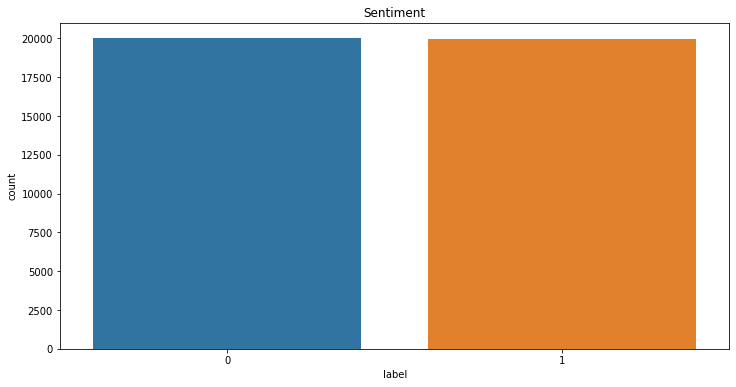

In [7]:
plt.figure(figsize=(12,6))
plt.title('Sentiment')
sns.countplot(x='label',data=train)

In [8]:
train['word_count']=train['text'].str.lower().str.len()
train

,text,label,word_count
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983
...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,3111
39996,This movie is an incredible piece of work. It ...,1,291
39997,My wife and I watched this movie because we pl...,0,1092
39998,"When I first watched Flatliners, I was amazed....",1,1045


Text(0.5, 1.0, 'Number of Words')

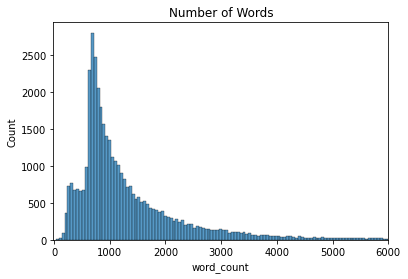

In [9]:
plt.xlim(-10, 6000)
sns.histplot(data=train, x="word_count").set_title('Number of Words')

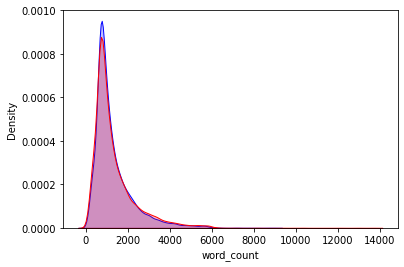

In [10]:
pos_count =  train['word_count'][train['label']==0]
pos_plot = sns.kdeplot(pos_count,color='b',shade=True)
neg_count = train['word_count'][train['label']==1]
neg_plot = sns.kdeplot(neg_count,color='r',shade=True)

In [15]:
def preprocess(data):
    stop = stopwords.words('english')
    punct = '''!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~'''
    data['text'] = data['text'].str.lower()
    data['text'] = data['text'].apply(lambda x:' '.join([words for words in x.split() if words not in stop]))
    data['text'] = data['text'].str.translate(str.maketrans('', '', punct))
    data['word_count'] = data['text'].str.split().str.len()
    return data

train = preprocess(train)
train.head()

,text,label,word_count
0,grew b. 1965 watching loving thunderbirds. mat...,0,87
1,put movie dvd player sat coke chips expectatio...,0,162
2,people know particular time past like feel nee...,0,99
3,even though great interest biblical movies bor...,0,33
4,im die hard dads army fan nothing ever change ...,1,109


In [16]:
def lemmatize(data):
    lemmatizer=WordNetLemmatizer()
    data['text'] = data['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w,pos_tag(w)) for w in word_tokenize(x)]))
    return data

In [17]:
def pos_tag(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag,wordnet.NOUN)

In [25]:
train = lemmatize(train)
train

,text,label,word_count
0,grow b . 1965 watch love thunderbird . mate sc...,0,87
1,put movie dvd player sat coke chip expectation...,0,162
2,people know particular time past like feel nee...,0,99
3,even though great interest biblical movie bore...,0,33
4,im die hard dad army fan nothing ever change t...,1,109
...,...,...,...
39995,western union something forgotten classic west...,1,300
39996,movie incredible piece work . explores every n...,1,28
39997,wife watch movie plan visit sicily stromboli s...,0,105
39998,first watch flatliners amaze . necessary featu...,1,96


In [26]:
 train['text'][0]

'grow b . 1965 watch love thunderbird . mate school watch . played thunderbird school lunch school . want virgil scott . one want alan . counting 5 become art form . take child see movie hop would get glimpse love child . bitterly disappoint . high point snappy theme tune . could compare original score thunderbird . thankfully early saturday morning one television channel still play rerun series gerry anderson wife create . jonatha frakes hand director chair version completely hopeless . waste film . utter rubbish . cgi remake may acceptable replace marionette homo sapiens subsp . sapiens huge error judgment .'

In [27]:
#Getting postive and negative sentiment records for wordcloud

positive = train['text'][train['label']==1]
negative = train['text'][train['label']==0]
stop = set(stopwords.words('english'))
stop.update(["br", "href","film","movie","one"])
print(stop)
#negative
## Wordcloud
pos_wordcloud = WordCloud(stopwords=stop).generate(' '.join(positive))
neg_wordcloud = WordCloud(stopwords=stop).generate(' '.join(negative))

{'between', 'from', 'so', 'be', 'again', 'by', 'all', "hadn't", 'not', 'they', 'myself', 'over', 'a', "shan't", "won't", 'shan', 'or', 'wouldn', 'needn', 'down', 'movie', 'through', 'who', 'hasn', 'yourselves', 'did', 'there', 'himself', 'don', "mustn't", 'of', 'each', 'isn', 'and', "mightn't", 'yours', 'ours', 'at', 'am', 'he', "it's", 'we', 'me', 'had', 'whom', 'haven', 'is', 'shouldn', 'our', 'doing', 'my', 'on', 'just', "aren't", 'yourself', 'once', 'for', 'both', 'same', 'against', 'hadn', 'weren', 'i', 'but', 'couldn', 'about', 'then', 'now', "that'll", 'this', 'where', 'having', 'do', 't', 'an', 'into', 'm', 'no', 'herself', 'as', 'theirs', "don't", 'up', 'more', "shouldn't", 'such', 'mustn', 'itself', 'being', 'your', 'it', 'further', 'mightn', 'until', 'because', 'if', 'what', 'why', 'to', 'than', 'those', 'aren', "isn't", 'only', 'ma', 'themselves', 'hers', 'very', 'were', 'during', 'o', 'has', 'most', 'can', 'off', 'some', "wasn't", 'him', 'after', 'before', 'll', "weren't",

In [28]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)

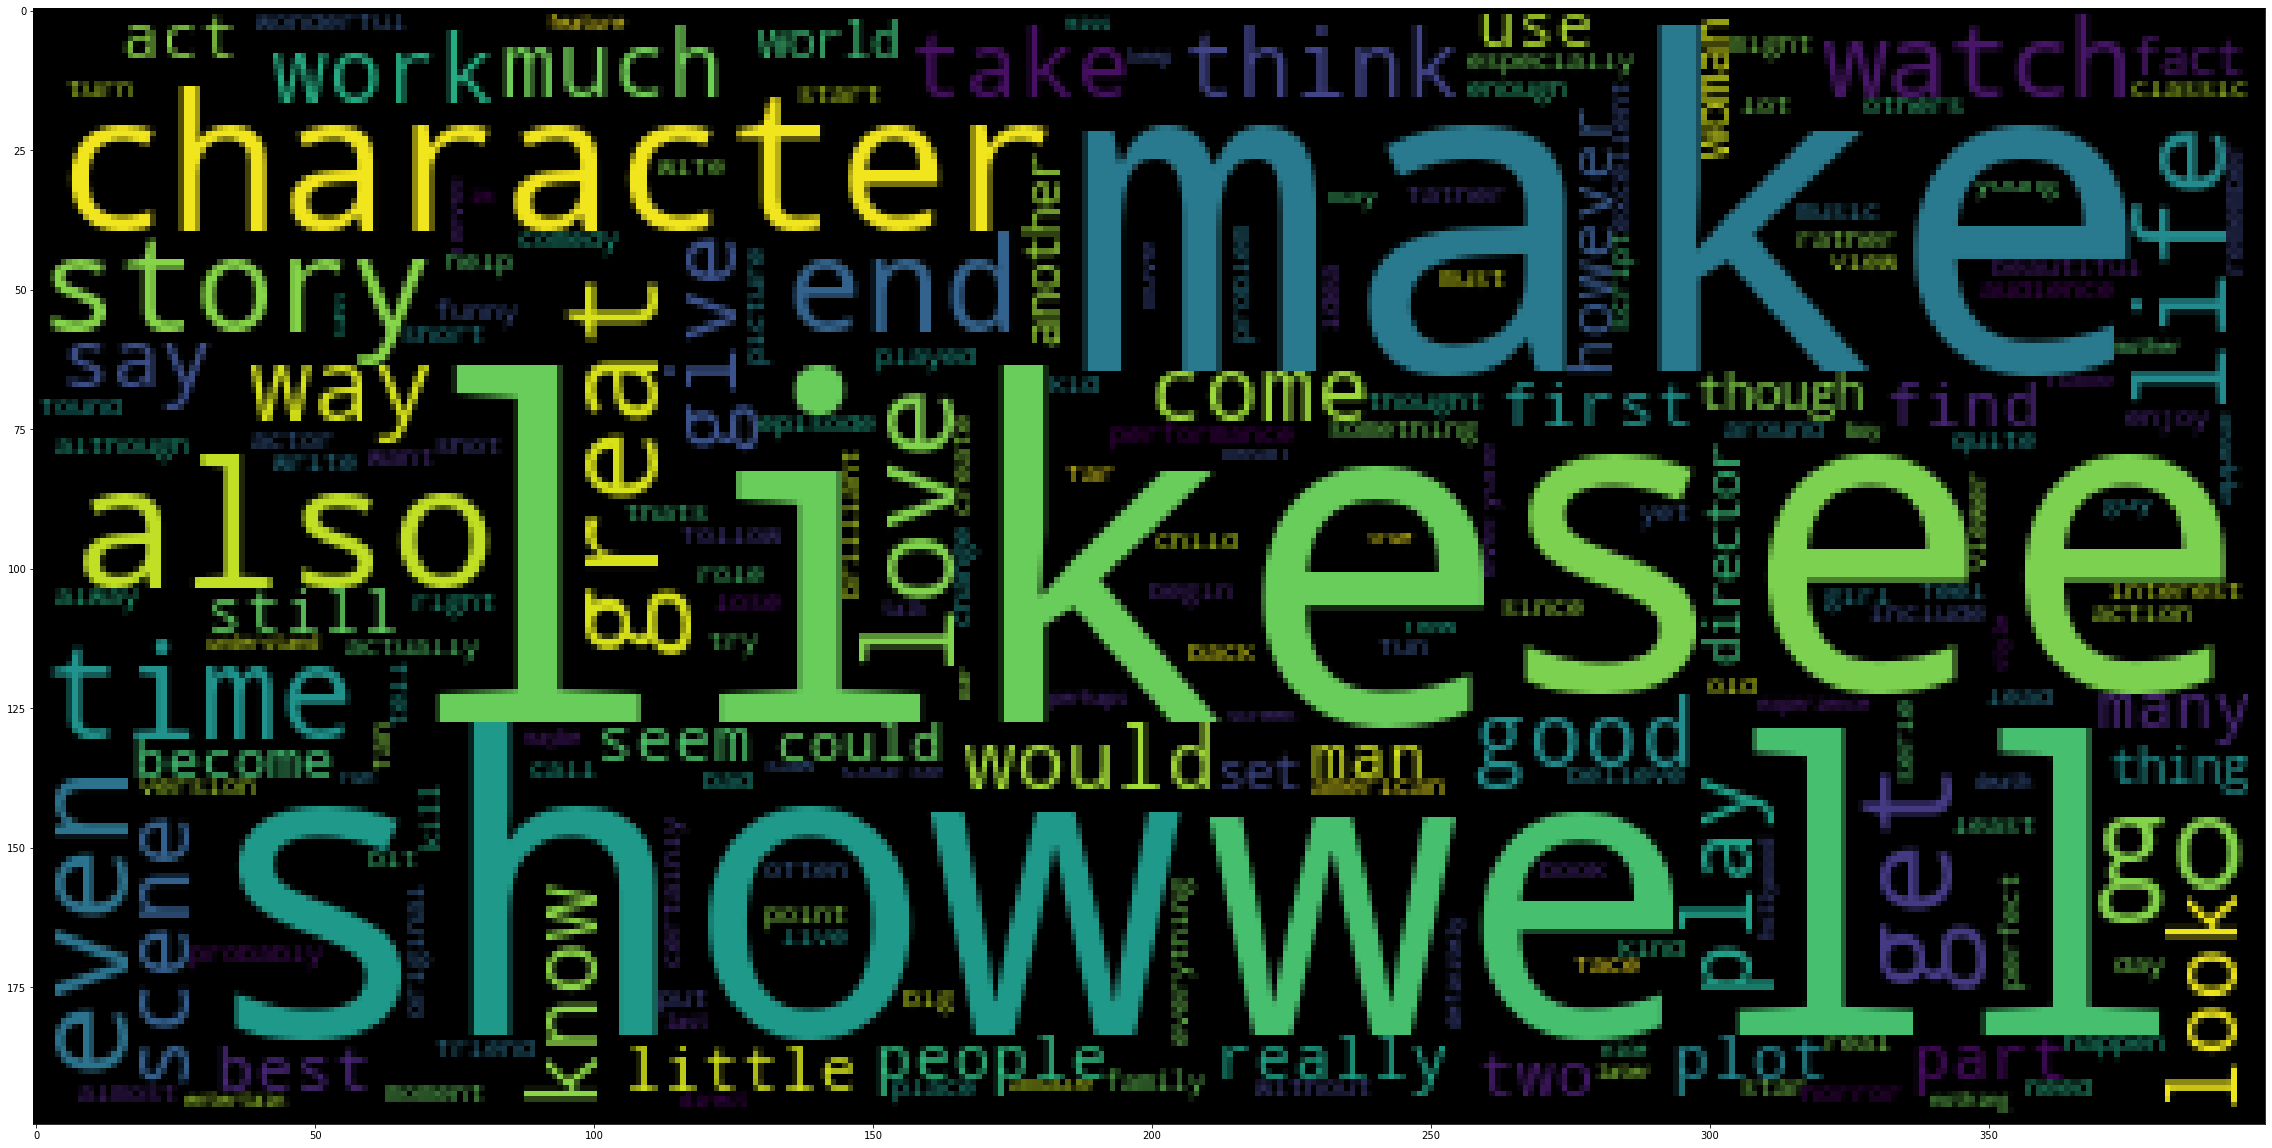

In [29]:
plot_cloud(pos_wordcloud)

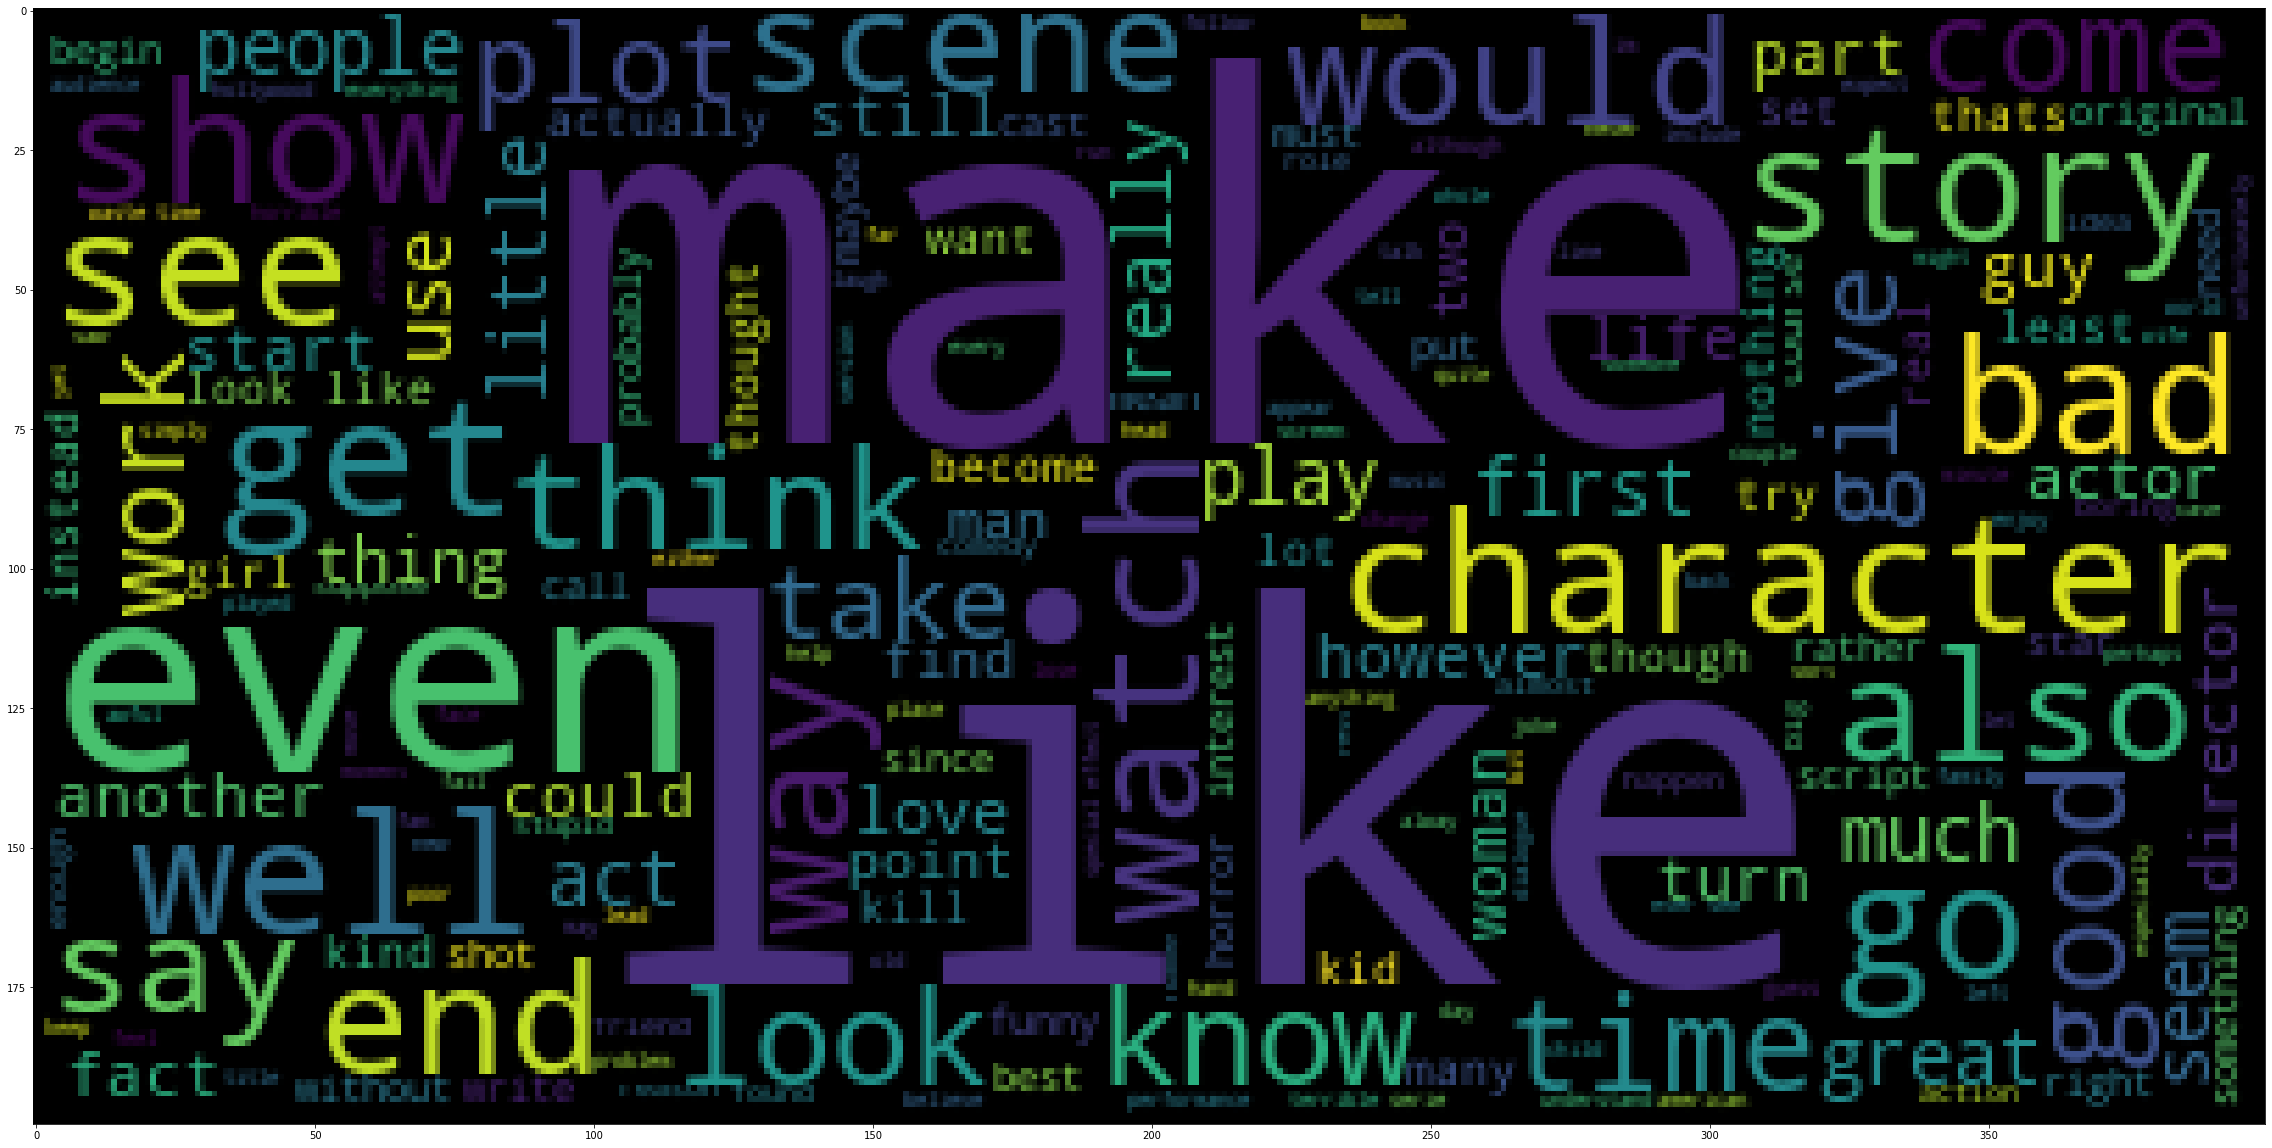

In [30]:
plot_cloud(neg_wordcloud)

In [32]:
#Removing word_count column
train_data = train[['text','label']]
train_data

,text,label
0,grow b . 1965 watch love thunderbird . mate sc...,0
1,put movie dvd player sat coke chip expectation...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movie bore...,0
4,im die hard dad army fan nothing ever change t...,1
...,...,...
39995,western union something forgotten classic west...,1
39996,movie incredible piece work . explores every n...,1
39997,wife watch movie plan visit sicily stromboli s...,0
39998,first watch flatliners amaze . necessary featu...,1


In [33]:
## Count Vectorization Implementation
tfidf_converter = TfidfVectorizer(max_features=1000,min_df=5,max_df=0.7)
x = tfidf_converter.fit_transform(train['text']).toarray()
y = train['label']

In [34]:
y

0        0
1        0
2        0
3        0
4        1
        ..
39995    1
39996    1
39997    0
39998    1
39999    1
Name: label, Length: 40000, dtype: int64

In [35]:
x

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.1085535,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gnb = GaussianNB()
gnb.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
test_data = preprocess(test)
test_data

,text,label,word_count
0,always wrote series complete stinkfest jim bel...,0,205
1,1st watched 1272002 3 10dirsteve purcell typi...,0,96
2,movie poorly written directed fell asleep 30 m...,0,116
3,interesting thing miryang secret sunshine acto...,1,409
4,first read berlin meer expect much. thought ri...,0,95
...,...,...,...
4995,kind picture john lassiter would making today ...,1,55
4996,must see saw whipped press screening hilarious...,1,92
4997,nbc ashamed. allow children see this. definite...,0,64
4998,movie clumsy mishmash various ghoststory suspe...,0,71


In [38]:
x_test_data = test_data[['text']]
y_test_data = test_data[['label']]

In [39]:
x_tst_data = tfidf_converter.transform(x_test_data['text']).toarray()

In [46]:
y_pred = gnb.predict(x_tst_data)

In [47]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [42]:
y_test_data

,label
0,0
1,0
2,0
3,1
4,0
...,...
4995,1
4996,1
4997,0
4998,0


In [49]:
accuracy_score(y_test_data,y_pred)

0.7914

In [50]:
text = ['that is too bad.but i can assure it can be made better','not sure if the climax really did well','as expected']
text = tfidf_converter.transform(text).toarray()
print(gnb.predict(text))

[0 0 1]


In [51]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(y_test_data, y_pred)

In [52]:
from sklearn.metrics import f1_score
f1_score(y_test_data, y_pred, average='micro')

0.7914

In [53]:
ConfusionMatrix = pd.DataFrame(a, columns = ['Predicted: No', 'Predicted: Yes'], index =['Actual: No', 'Actual: Yes'])

In [54]:
ConfusionMatrix

,Predicted: No,Predicted: Yes
Actual: No,1922,573
Actual: Yes,470,2035


In [55]:
p = a[1][1]/(a[1][1]+a[0][1])
p

0.7802914110429447

In [56]:
r = a[1][1]/(a[1][1]+a[1][0])
r

0.812375249500998

In [57]:
f = 2*(p*r)/(p+r)

In [58]:
f

0.796010170154508

In [59]:
def models(X_train, Y_train):
    #logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    #Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski' , p=2)
    knn.fit(X_train,Y_train)
    
    #SVC(linear kernal)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0 )
    svc_lin.fit(X_train,Y_train)
    
    #SVC(RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0 )
    svc_rbf.fit(X_train,Y_train)
    
    #GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB( )
    gauss.fit(X_train,Y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy',random_state = 0 )
    tree.fit(X_train,Y_train)
    
    #RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier( n_estimators=10  , criterion='entropy',random_state = 0)
    forest.fit(X_train,Y_train)
    
    #print Accuracy
    print('[0]Logistic Regression training accuracy ---->>>', log.score(X_train,Y_train))
    print('[1]KNN Regression training accuracy ---->>>', knn.score(X_train,Y_train))
    print('[2]SVC_LiN Regression training accuracy ---->>>', svc_lin.score(X_train,Y_train))
    print('[3]SVC_RBF Regression training accuracy ---->>>', svc_rbf.score(X_train,Y_train))
    print('[4]Gaussian Regression training accuracy ---->>>', gauss.score(X_train,Y_train))
    print('[5]Decision Tree Regression training accuracy ---->>>', tree.score(X_train,Y_train))
    print('[5]Random Forest Regression training accuracy ---->>>', forest.score(X_train,Y_train))
    
    return log,knn,svc_lin,svc_rbf,gauss,tree,forest

In [60]:
model = models(x,y)

[0]Logistic Regression training accuracy ---->>> 0.87415
[1]KNN Regression training accuracy ---->>> 0.820275
[2]SVC_LiN Regression training accuracy ---->>> 0.876475
[3]SVC_RBF Regression training accuracy ---->>> 0.95885
[4]Gaussian Regression training accuracy ---->>> 0.8133
[5]Decision Tree Regression training accuracy ---->>> 1.0
[5]Random Forest Regression training accuracy ---->>> 0.992975


##### __End of Assigment__ 